In [1]:
import os
if not os.path.exists('san_rafael'):
    !wget -O san_rafael.zip https://www.dropbox.com/scl/fi/pyl1h8g56xdp74568aizj/san_rafael.zip?rlkey=kvfzhierbe938lt4vdgjx8mv6&dl=1
    !unzip san_rafael.zip

Streaming output truncated to the last 5000 lines.
  inflating: san_rafael/label/002994.png  
  inflating: san_rafael/label/003452.png  
  inflating: san_rafael/label/003334.png  
  inflating: san_rafael/label/001523.png  
  inflating: san_rafael/label/000629.png  
  inflating: san_rafael/label/001537.png  
  inflating: san_rafael/label/003320.png  
  inflating: san_rafael/label/002980.png  
  inflating: san_rafael/label/003446.png  
  inflating: san_rafael/label/002758.png  
  inflating: san_rafael/label/001251.png  
  inflating: san_rafael/label/002770.png  
  inflating: san_rafael/label/001279.png  
  inflating: san_rafael/label/000167.png  
  inflating: san_rafael/label/000601.png  
  inflating: san_rafael/label/002016.png  
  inflating: san_rafael/label/003308.png  
  inflating: san_rafael/label/002002.png  
  inflating: san_rafael/label/000615.png  
  inflating: san_rafael/label/000173.png  
  inflating: san_rafael/label/002764.png  
  inflating: san_rafael/label/002823.png  
  i

In [2]:
from keras import Sequential
from keras.optimizers import SGD, Adam
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Lambda
from keras.regularizers import L2
import numpy as np
import keras
from matplotlib import pyplot as plt
import imageio
import glob

In [3]:
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
def load_data(paths):

  images = []
  for path in paths:
    img = imageio.v2.imread(path)
    img_array = np.array(img)
    images.append(img_array)

  return np.array(images)

In [ ]:
!cd san_rafael

In [ ]:
!ls

__MACOSX  sample_data  san_rafael  san_rafael.zip


In [5]:
images_path = glob.glob('san_rafael/image/*.png')
height_path = glob.glob('san_rafael/height/*.png')
labels_path = glob.glob('san_rafael/label/*.png')


In [ ]:
images_path

['san_rafael/image/001440.png',
 'san_rafael/image/001695.png',
 'san_rafael/image/001768.png',
 'san_rafael/image/003376.png',
 'san_rafael/image/002098.png',
 'san_rafael/image/003147.png',
 'san_rafael/image/001476.png',
 'san_rafael/image/003454.png',
 'san_rafael/image/000319.png',
 'san_rafael/image/003026.png',
 'san_rafael/image/003433.png',
 'san_rafael/image/002185.png',
 'san_rafael/image/002434.png',
 'san_rafael/image/000443.png',
 'san_rafael/image/000808.png',
 'san_rafael/image/000536.png',
 'san_rafael/image/002988.png',
 'san_rafael/image/003812.png',
 'san_rafael/image/002161.png',
 'san_rafael/image/000421.png',
 'san_rafael/image/002013.png',
 'san_rafael/image/003648.png',
 'san_rafael/image/003887.png',
 'san_rafael/image/003479.png',
 'san_rafael/image/002412.png',
 'san_rafael/image/003484.png',
 'san_rafael/image/001762.png',
 'san_rafael/image/000303.png',
 'san_rafael/image/001169.png',
 'san_rafael/image/003397.png',
 'san_rafael/image/003019.png',
 'san_ra

In [6]:
images = load_data(images_path)
heights = load_data(height_path)
labels = load_data(labels_path)

In [7]:
heights = heights.astype('float32') / np.max(heights)

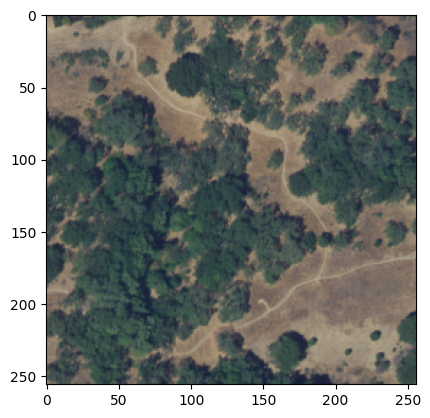

In [ ]:
plt.imshow(images[0])
plt.show()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]], dtype=uint8)
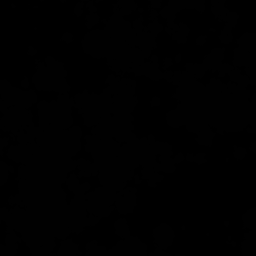

In [ ]:
labels[0]

In [ ]:
heights[0]

array([[0.        , 0.        , 0.00819672, ..., 0.00819672, 0.01639344,
        0.01639344],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03278688, 0.04098361, 0.04918033, ..., 0.10655738, 0.09836066,
        0.09016393],
       [0.02459016, 0.02459016, 0.03278688, ..., 0.09836066, 0.09836066,
        0.08196721],
       [0.01639344, 0.02459016, 0.03278688, ..., 0.09016393, 0.08196721,
        0.07377049]], dtype=float32)

In [8]:
images_train, images_test, heights_train, heights_test, labels_train, labels_test = train_test_split(
    images, heights, labels, test_size=0.1, random_state=16
)

In [ ]:
print(len(images_train))
print(len(images_test))
print(images_train.shape)

3636
404
(3636, 256, 256, 3)


In [9]:
model = Sequential([
    Input(shape=(256, 256, 3)),
    Lambda(lambda x: x / 255 - .5), #data normalization
    Conv2D(32, 3, activation='relu', padding='same'),
    Conv2D(64, 3, activation='relu', padding='same'),
    Conv2D(1, (1, 1), activation='sigmoid', padding='same')
]
)

In [11]:
model.compile(optimizer=Adam(learning_rate=.0004),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(images_train, labels_train, validation_split=0.1, batch_size = 32, epochs = 10, verbose=True)


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 29s 169ms/step - accuracy: 0.6570 - loss: 0.6135 - val_accuracy: 0.8091 - val_loss: 0.4337
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.8344 - loss: 0.3938 - val_accuracy: 0.8600 - val_loss: 0.3419
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.8636 - loss: 0.3305 - val_accuracy: 0.8662 - val_loss: 0.3202
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.8652 - loss: 0.3163 - val_accuracy: 0.8680 - val_loss: 0.3134
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.8691 - loss: 0.3073 - val_accuracy: 0.8688 - val_loss: 0.3097
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - accuracy: 0.8664 - loss: 0.3076 - val_accuracy: 0.8684 - val_loss: 0.3102
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.8697 - loss: 0.3042 - val_accuracy: 0.8702 - val_loss: 0.3062
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.8707 - loss: 0.3

In [ ]:
loss, acc = model.evaluate(images_test, labels_test)

print("loss is", loss)
print("accuracy is", acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8719 - loss: 0.3008
loss is 0.30228838324546814
accuracy is 0.8709386587142944


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


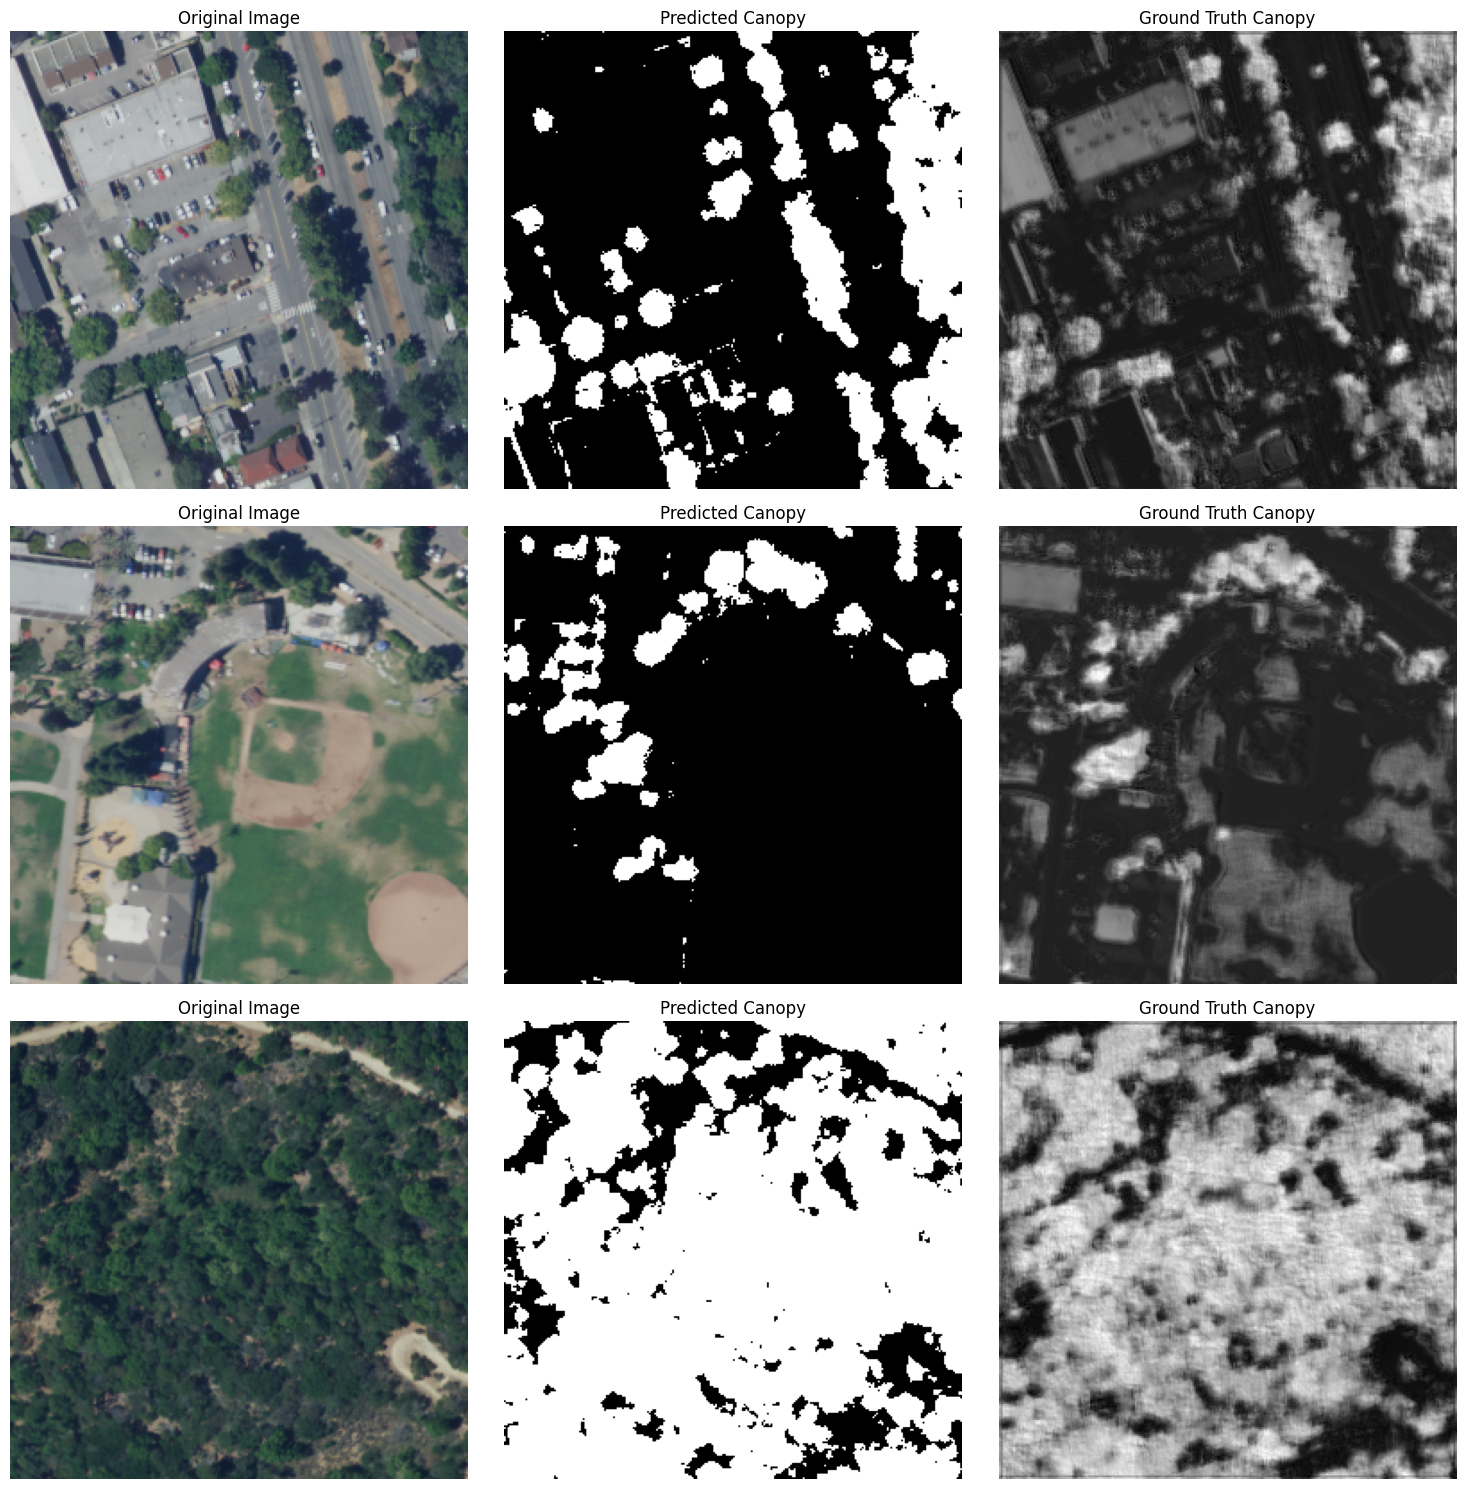

In [32]:
num_images = 3
indices = np.random.choice(len(images_test), num_images, replace=False)
sample_images = images_test[indices]
sample_labels = labels_test[indices]

# Get model predictions
predictions = model.predict(sample_images)


# Plot each image with its predicted and true labels
plt.figure(figsize=(15, num_images * 5))
for i in range(num_images):
    # Display the original image
    plt.subplot(num_images, 3, i * 3 + 1)
    plt.imshow(sample_images[i])
    plt.title("Original Image")
    plt.axis("off")

    # Display label
    plt.subplot(num_images, 3, i * 3 + 2)
    plt.imshow(sample_labels[i], cmap='gray')
    plt.title("Predicted Canopy")
    plt.axis("off")

    # Display predications
    plt.subplot(num_images, 3, i * 3 + 3)
    plt.imshow(predictions[i], cmap='gray')
    plt.title("Ground Truth Canopy")
    plt.axis("off")

plt.tight_layout()
plt.show()



In [16]:
#Regression CNN
model2 = Sequential([
    Input(shape=(256, 256, 3)),
    Lambda(lambda x: x / 255 - .5), #data normalization
    Conv2D(32, 3, activation='relu', padding='same'),
    Conv2D(64, 3, activation='relu', padding='same'),
    Conv2D(1, (1, 1), activation='linear', padding='same')
]
)

In [17]:
model2.compile(optimizer=Adam(learning_rate=.0004),
              loss='mean_absolute_error')

In [18]:
# Assuming you have images_train, heights_train, and validation_split=0.1 already set up
history = model2.fit(
    images_train,
    heights_train,
    validation_split=0.1,
    batch_size=32,
    epochs=10,
    verbose=True
)


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 13s 116ms/step - loss: 0.0296 - val_loss: 0.0259
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - loss: 0.0265 - val_loss: 0.0252
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - loss: 0.0250 - val_loss: 0.0247
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 0.0245 - val_loss: 0.0246
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - loss: 0.0247 - val_loss: 0.0245
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - loss: 0.0250 - val_loss: 0.0241
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - loss: 0.0239 - val_loss: 0.0243
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - loss: 0.0251 - val_loss: 0.0240
Epoch 9/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - loss: 0.0247 - val_loss: 0.0238
Epoch 10/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 0.0234 - val_loss: 0.0253


In [19]:
test_loss = model2.evaluate(images_test, heights_test)
print("Test MAE:", test_loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0269
Test MAE: 0.026347732171416283


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


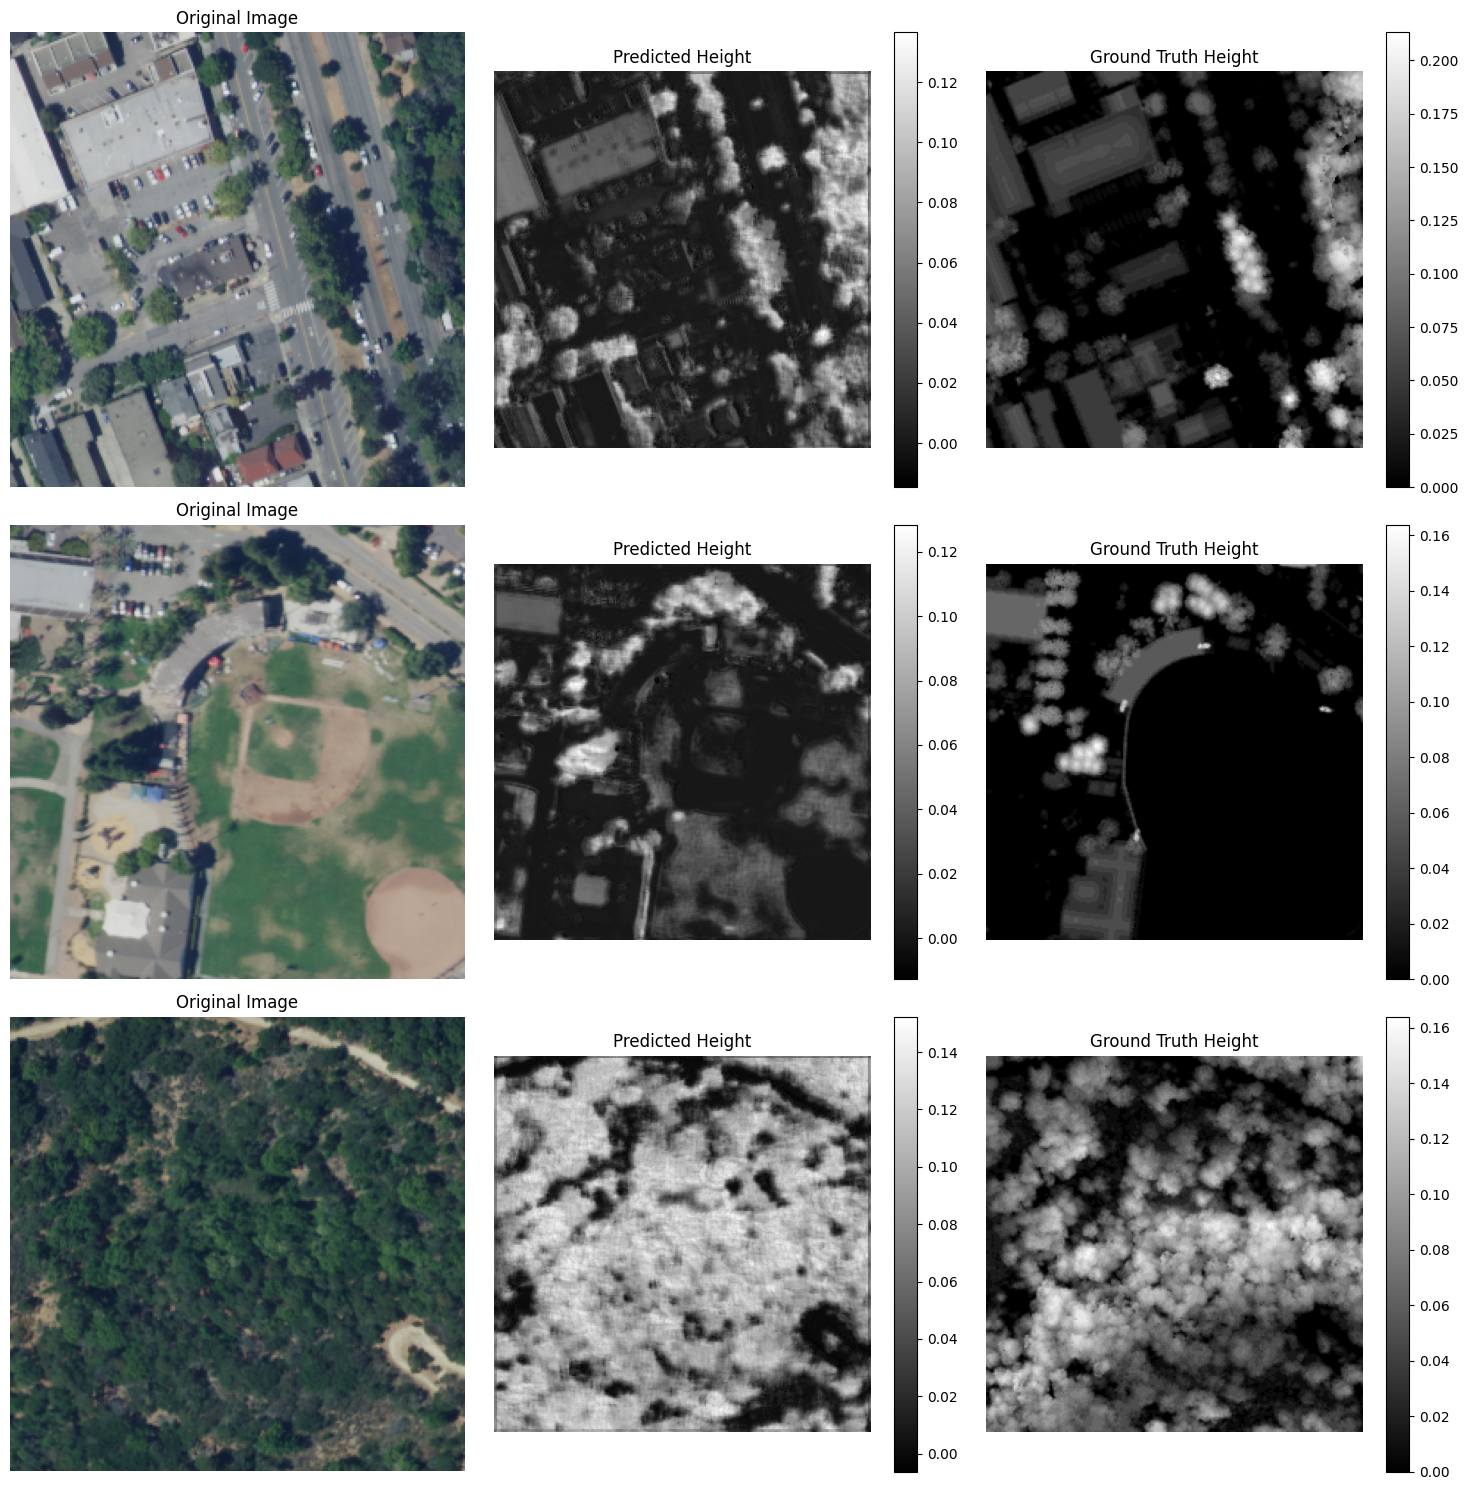

In [33]:
sample_heights_true = heights_test[indices]

sample_heights_pred = model2.predict(sample_images)

# Chat helped with subplots been awhile
plt.figure(figsize=(15, num_images * 5))
for i in range(num_images):
    plt.subplot(num_images, 3, i * 3 + 1)
    plt.imshow(sample_images[i])
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(num_images, 3, i * 3 + 2)
    plt.imshow(sample_heights_pred[i], cmap='gray')
    plt.title("Predicted Height")
    plt.colorbar()
    plt.axis("off")

    plt.subplot(num_images, 3, i * 3 + 3)
    plt.imshow(sample_heights_true[i], cmap='gray')
    plt.title("Ground Truth Height")
    plt.colorbar()
    plt.axis("off")

plt.tight_layout()
plt.show()